In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
import re
from pprint import pprint

# Visualization
import seaborn as sns

# Scikit-learn: text vectorization, model training, evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Model saving/loading
import joblib

# Optional: PyTorch if using deep learning models
import torch

In [ ]:
file_path = "/content/drive/MyDrive/Tushitaacleaned_disaster_tweets.csv"
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully.")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully.


In [ ]:
df.head()

,tweet_id,tweet_text,label,source,clean_text
0,'383600460340666369',RT @Faiz_Baluch: #BalochistanEarthQuake Pakist...,other_useful_information,2013_Pakistan_Earthquake,balochistanearthquake pakistan army terrorizin...
1,'383790723222364161',#Earthquake 2013-09-28 02:39:43 (M5.0) EAST OF...,other_useful_information,2013_Pakistan_Earthquake,earthquake east south sandwich island fa notice
2,'384232048124518400',#earthquake M2.2: Puerto Rico region http://t....,other_useful_information,2013_Pakistan_Earthquake,earthquake puerto rico region
3,'384860484643475456',#PAKISTAN: #NASA releases images of Pakistan's...,other_useful_information,2013_Pakistan_Earthquake,pakistan nasa release image pakistan earthquak...
4,'383407962619772928',"【#USGS #alert】 M 1.5, Central Alaska: Septembe...",other_useful_information,2013_Pakistan_Earthquake,usgs alert central alaska september gmt earthq...


In [ ]:
df.shape

(22099, 5)

In [ ]:
df = df.dropna(subset=['clean_text'])  # Drop rows where clean_text is NaN


In [ ]:
# Step 1: NLTK Setup
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
file_path = '/content/drive/MyDrive/TwitterData - Sheet1.csv'
try:
    df_RealData = pd.read_csv(file_path)
    print("File loaded successfully.")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully.


In [ ]:
df_RealData.head()

,Tweet ID,URL,Content,Likes,Retweet,Reply,Date,Views count,Quote count,Location,Source,#Hashtag
0,1.933136e+18,https://x.com/SouthernDefence/status/193313554...,Pakistan expresses deep sorrow over the tragic...,129,60,27,"June 12, 2025 at 12:13 PM",55702,NaN,NaN,NaN,NaN
1,1.933064e+18,https://x.com/masijeevi/status/193306380788008...,Biggest Foreign Policy disaster for India is i...,3565,895,104,"June 12, 2025 at 07:28 AM",57279,NaN,NaN,NaN,NaN
2,1.933148e+18,https://x.com/viralikpa/status/193314784992109...,The footage from the Air India disaster is sim...,4,2,0,"June 12, 2025 at 01:02 PM",2410,NaN,NaN,NaN,NaN
3,1.933261e+18,https://x.com/DeepikaBhardwaj/status/193326147...,This disaster could have been avoided only if ...,2063,429,103,"June 12, 2025 at 08:33 PM",162829,NaN,NaN,NaN,NaN
4,1.933290e+18,https://x.com/pubity/status/1933290008833921483,"With over 260 lives lost, the Air India crash ...",523,34,6,"June 12, 2025 at 10:27 PM",25421,NaN,NaN,NaN,NaN


In [ ]:
import string
# ✅ Step 2: Define the clean_text function BEFORE using it
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)            # Remove mentions
    text = re.sub(r"#\w+", "", text)            # Remove hashtags
    text = re.sub(r"\d+", "", text)             # Remove numbers
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()    # Remove extra spaces
    return text

# Step 3: Clean the Content column
df_RealData['clean_text'] = df_RealData['Content'].fillna('').apply(clean_text)

In [ ]:
!pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 19.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib

In [ ]:
from gensim.models import Word2Vec



📘 Word2Vec + Logistic Regression
              precision    recall  f1-score   support

           0       0.53      0.53      0.53       110
           1       0.35      0.05      0.09       211
           2       0.00      0.00      0.00        15
           3       0.54      0.52      0.53        69
           4       1.00      0.01      0.03        67
           5       0.80      0.04      0.07       114
           6       0.57      0.68      0.62       600
           7       0.60      0.35      0.44       286
           8       0.76      0.80      0.78       548
           9       0.00      0.00      0.00        83
          10       0.53      0.52      0.53       526
          11       0.48      0.72      0.58      1250
          12       0.29      0.04      0.07        51
          13       0.71      0.56      0.63       415
          14       0.51      0.27      0.35        74

    accuracy                           0.56      4419
   macro avg       0.51      0.34      0.35   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🌲 Word2Vec + Random Forest
              precision    recall  f1-score   support

           0       0.65      0.56      0.60       110
           1       0.56      0.14      0.23       211
           2       0.78      0.47      0.58        15
           3       0.54      0.52      0.53        69
           4       0.65      0.39      0.49        67
           5       0.50      0.11      0.17       114
           6       0.55      0.72      0.63       600
           7       0.60      0.40      0.48       286
           8       0.80      0.80      0.80       548
           9       0.20      0.02      0.04        83
          10       0.61      0.53      0.57       526
          11       0.52      0.72      0.61      1250
          12       0.48      0.20      0.28        51
          13       0.70      0.58      0.63       415
          14       0.50      0.31      0.38        74

    accuracy                           0.59      4419
   macro avg       0.58      0.43      0.47      441

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:34:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🚀 Word2Vec + XGBoost
              precision    recall  f1-score   support

           0       0.70      0.57      0.63       110
           1       0.46      0.18      0.26       211
           2       0.73      0.53      0.62        15
           3       0.59      0.49      0.54        69
           4       0.55      0.39      0.46        67
           5       0.65      0.18      0.28       114
           6       0.57      0.71      0.63       600
           7       0.57      0.42      0.49       286
           8       0.79      0.80      0.80       548
           9       0.15      0.04      0.06        83
          10       0.62      0.54      0.58       526
          11       0.53      0.70      0.61      1250
          12       0.62      0.31      0.42        51
          13       0.69      0.60      0.64       415
          14       0.48      0.45      0.46        74

    accuracy                           0.60      4419
   macro avg       0.58      0.46      0.50      4419
weig

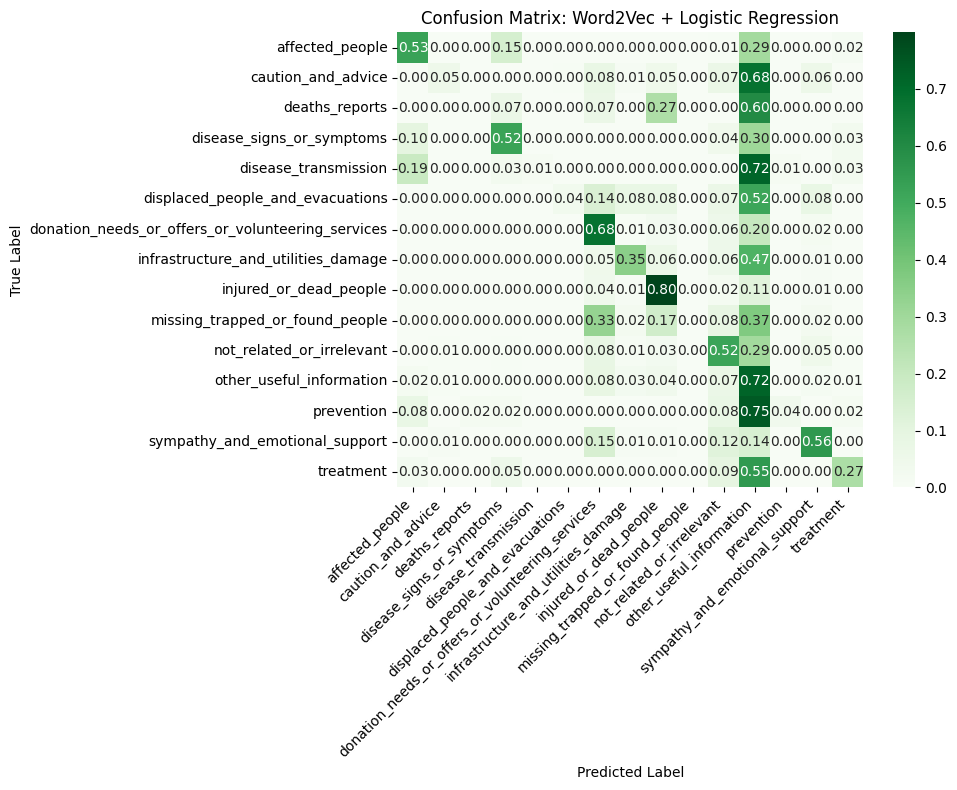

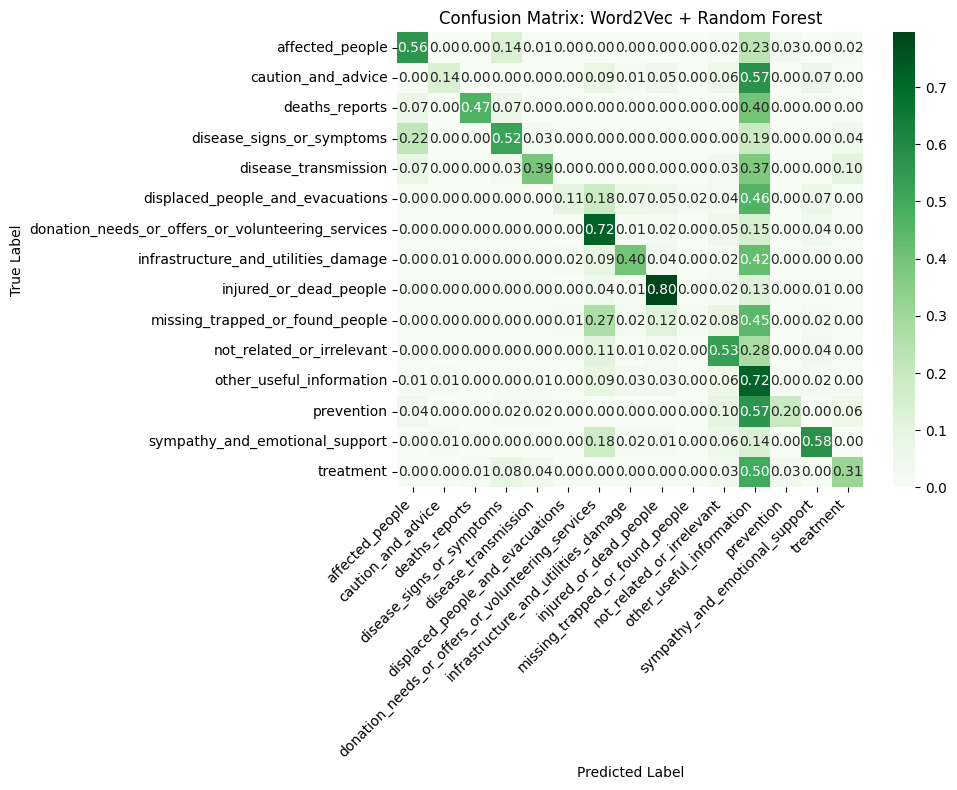

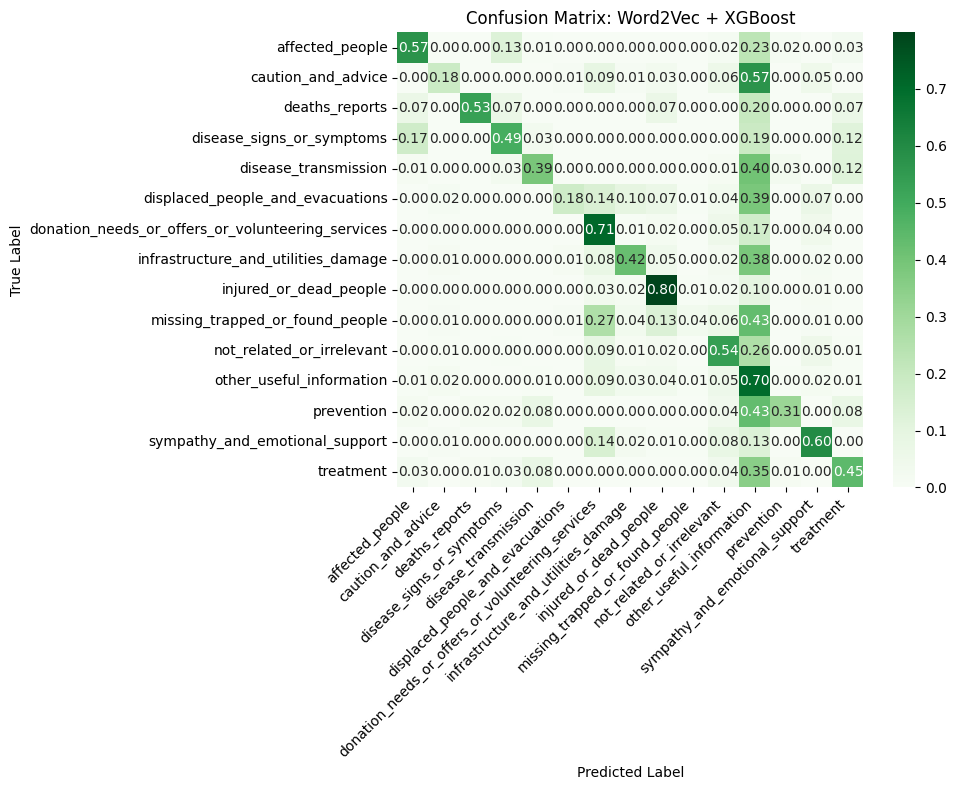

In [ ]:
import pandas as pd
import numpy as np
import re
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocess text into list of words for Word2Vec
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    return text.split()

# Apply preprocessing
sentences = df['clean_text'].apply(preprocess_text)

# Train Word2Vec model
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# Generate averaged Word2Vec embeddings per document
def get_avg_w2v_vector(words):
    vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(w2v_model.vector_size)

X_w2v = np.array([get_avg_w2v_vector(s) for s in sentences])

# Encode labels
y_encoded = LabelEncoder()
y = y_encoded.fit_transform(df['label'])
label_names = y_encoded.classes_

# Split
X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, stratify=y, random_state=42)

# ------------------- Regression (Logistic) -------------------
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("\n📘 Word2Vec + Logistic Regression")
print(classification_report(y_test, y_pred_lr))

# ------------------- Random Forest -------------------
rf_model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\n🌲 Word2Vec + Random Forest")
print(classification_report(y_test, y_pred_rf))

# ------------------- XGBoost -------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\n🚀 Word2Vec + XGBoost")
print(classification_report(y_test, y_pred_xgb))

# ------------------- Confusion Matrix Plot -------------------
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Greens", xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y_test, y_pred_lr, label_names, "Word2Vec + Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, label_names, "Word2Vec + Random Forest")
plot_confusion_matrix(y_test, y_pred_xgb, label_names, "Word2Vec + XGBoost")


In [ ]:
df_RealData[['Content', 'predicted_label']].head(5)

,Content,predicted_label
0,Pakistan expresses deep sorrow over the tragic...,other_useful_information
1,Biggest Foreign Policy disaster for India is i...,other_useful_information
2,The footage from the Air India disaster is sim...,other_useful_information
3,This disaster could have been avoided only if ...,other_useful_information
4,"With over 260 lives lost, the Air India crash ...",other_useful_information
